In [2]:
from sktime.datasets import load_from_tsfile_to_dataframe
import pandas as pd
import numpy as np
import os

def load_heartbeat_data(root_path='./dataset/Heartbeat/'):
    """
    Load Heartbeat dataset from .ts files
    
    Args:
        root_path (str): Path to Heartbeat dataset directory
    
    Returns:
        tuple: (train_x, train_y, test_x, test_y)
    """
    # Define file paths
    train_path = os.path.join(root_path, 'Heartbeat_TRAIN.ts')
    test_path = os.path.join(root_path, 'Heartbeat_TEST.ts')
    
    # Load training data
    print("Loading training data...")
    train_x, train_y = load_from_tsfile_to_dataframe(
        train_path,
        return_separate_X_and_y=True,
        replace_missing_vals_with='NaN'
    )
    
    # Load test data
    print("Loading test data...")
    test_x, test_y = load_from_tsfile_to_dataframe(
        test_path,
        return_separate_X_and_y=True,
        replace_missing_vals_with='NaN'
    )
    
    # Print dataset information
    print("\nDataset Information:")
    print(f"Training samples: {len(train_x)}")
    print(f"Test samples: {len(test_x)}")
    print(f"Number of features: {len(train_x.columns)}")
    print(f"Unique classes: {np.unique(train_y)}")
    
    return train_x, train_y, test_x, test_y

if __name__ == "__main__":
    # Load the dataset
    train_x, train_y, test_x, test_y = load_heartbeat_data()
    
    # Display sample of the data
    print("\nSample of training data:")
    print("\nFeatures (first sample):")
    print(train_x.iloc[0])
    print("\nLabel (first sample):")
    print(train_y[0])

Loading training data...
Loading test data...

Dataset Information:
Training samples: 204
Test samples: 205
Number of features: 61
Unique classes: ['abnormal' 'normal']

Sample of training data:

Features (first sample):
dim_0     0      0.000949
1      0.001488
2      0.00031...
dim_1     0      0.001288
1      0.001140
2      0.00043...
dim_2     0      0.000529
1      0.001635
2      0.00214...
dim_3     0      0.000563
1      0.001082
2      0.00061...
dim_4     0      0.000980
1      0.001680
2      0.00127...
                                ...                        
dim_56    0      0.039963
1      0.036272
2      0.03915...
dim_57    0      0.078962
1      0.085931
2      0.11061...
dim_58    0      0.078312
1      0.145680
2      0.23805...
dim_59    0      0.045608
1      0.119800
2      0.17813...
dim_60    0      0.121070
1      0.133850
2      0.04007...
Name: 0, Length: 61, dtype: object

Label (first sample):
normal


train_x shape: (204, 61)
train_x.iloc[0] shape: (61,)
train_x.iloc[0][0] shape: (405,)


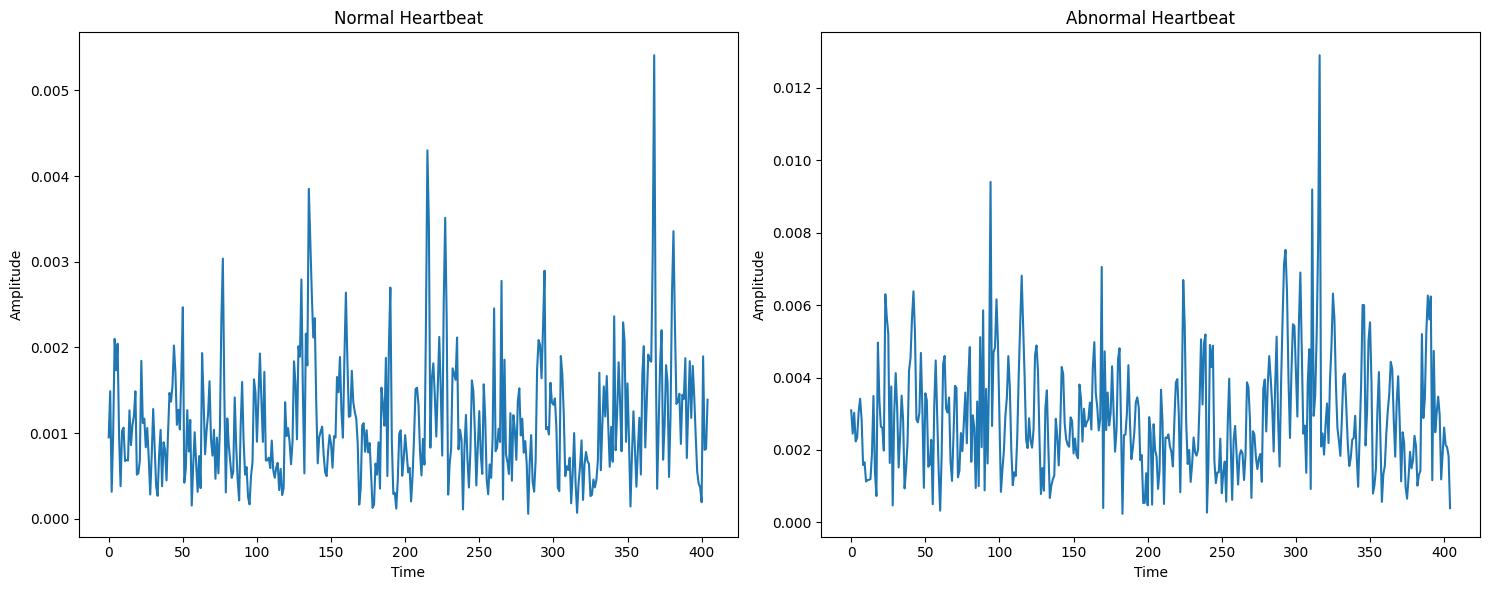

In [3]:
# Get shape information
print(f"train_x shape: {train_x.shape}")
print(f"train_x.iloc[0] shape: {train_x.iloc[0].shape}")
print(f"train_x.iloc[0][0] shape: {train_x.iloc[0][0].shape}")

    
# Visualize a sample from each class
import matplotlib.pyplot as plt

# Get one sample from each class
normal_idx = np.where(train_y == 'normal')[0][0]
abnormal_idx = np.where(train_y == 'abnormal')[0][0]

# Prepare the plot
plt.figure(figsize=(15, 6))

# Plot normal heartbeat
plt.subplot(1, 2, 1)
plt.plot(train_x.iloc[normal_idx][0].values)
plt.title('Normal Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot abnormal heartbeat
plt.subplot(1, 2, 2)
plt.plot(train_x.iloc[abnormal_idx][0].values)
plt.title('Abnormal Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [4]:
# Display basic DataFrame information
print(f"DataFrame shape: {train_x.shape}")
print(train_x.iloc[0].shape)
print(train_x.iloc[0][0].shape)
print(f"Number of samples: {len(train_x)}")
print(f"Columns: {train_x.columns.tolist()}")
print("\nDataFrame index info:", train_x.index)
# Print unique labels
print("\nUnique labels:", np.unique(train_y))


DataFrame shape: (204, 61)
(61,)
(405,)
Number of samples: 204
Columns: ['dim_0', 'dim_1', 'dim_2', 'dim_3', 'dim_4', 'dim_5', 'dim_6', 'dim_7', 'dim_8', 'dim_9', 'dim_10', 'dim_11', 'dim_12', 'dim_13', 'dim_14', 'dim_15', 'dim_16', 'dim_17', 'dim_18', 'dim_19', 'dim_20', 'dim_21', 'dim_22', 'dim_23', 'dim_24', 'dim_25', 'dim_26', 'dim_27', 'dim_28', 'dim_29', 'dim_30', 'dim_31', 'dim_32', 'dim_33', 'dim_34', 'dim_35', 'dim_36', 'dim_37', 'dim_38', 'dim_39', 'dim_40', 'dim_41', 'dim_42', 'dim_43', 'dim_44', 'dim_45', 'dim_46', 'dim_47', 'dim_48', 'dim_49', 'dim_50', 'dim_51', 'dim_52', 'dim_53', 'dim_54', 'dim_55', 'dim_56', 'dim_57', 'dim_58', 'dim_59', 'dim_60']

DataFrame index info: RangeIndex(start=0, stop=204, step=1)

Unique labels: ['abnormal' 'normal']


In [5]:
# Specify the path to the pickle file
save_path = '/opt/data/private/ZhouWenren/Time-Series-Library/full_merged_20240620江逸凡.edf.csv'
pickle_path = save_path
loaded_df = pd.read_csv(save_path)

# Display the first few rows of the DataFrame
print(loaded_df.head())

   Unnamed: 0                                             breath  \
0           0  [ 6.06369266e-02  3.92773893e-02  1.77041032e-...   
1           1  [-1.26034665 -1.27532088 -1.29034035 -1.305411...   
2           2  [ 6.36138138e-01  6.33344770e-01  6.30119898e-...   
3           3  [ 3.20472859e-01  3.04552419e-01  2.88331431e-...   
4           4  [-0.05464443 -0.07178581 -0.08871993 -0.105431...   

                                                 ECG  \
0  [-2.16040762e-04 -3.41317280e-05 -4.42747526e-...   
1  [-1.85149814e-05 -4.30547167e-05 -1.51992052e-...   
2  [ 7.69355278e-07 -5.85708489e-05 -5.63229567e-...   
3  [ 1.08663193e-05 -9.80157256e-06 -5.33307076e-...   
4  [ 3.47795440e-06 -1.78261772e-05 -2.61757520e-...   

                                                Thor  \
0  [-1.6490422  -1.64802715 -1.64904233 -1.650081...   
1  [ 8.26691576e-01  6.27187443e-01  4.60543270e-...   
2  [-8.61190423e-01 -7.64862270e-01 -5.76109787e-...   
3  [ 1.68155033  1.684192    1

In [13]:
# Filter for desired events
desired_events = ['No Event', 'Hypopnea', 'Central Apnea', 'Obstructive Apnea']
filtered_df = loaded_df[loaded_df['label'].isin(desired_events)].copy()

# Map events to new categories
event_mapping = {
    'No Event': 'No Event',
    'Hypopnea': 'OSA', 
    'Central Apnea': 'OSA',
    'Obstructive Apnea': 'OSA'
}
filtered_df['label'] = filtered_df['label'].map(event_mapping)

# Calculate class proportions
osa_ratio = len(filtered_df[filtered_df['label'] == 'OSA']) / len(filtered_df)
print(f"Overall OSA ratio: {osa_ratio:.3f}")

# Separate OSA and No Event records
osa_records = filtered_df[filtered_df['label'] == 'OSA']
no_event_records = filtered_df[filtered_df['label'] == 'No Event']

# Calculate train sizes maintaining proportions
train_size_osa = int(len(osa_records) * 0.7)
train_size_no_event = int(len(no_event_records) * 0.7)

# Split the data
train_osa = osa_records.sample(n=train_size_osa, random_state=42)
test_osa = osa_records.drop(train_osa.index)

train_no_event = no_event_records.sample(n=train_size_no_event, random_state=42)
test_no_event = no_event_records.drop(train_no_event.index)

# Combine train and test sets
train_df = pd.concat([train_osa, train_no_event])
test_df = pd.concat([test_osa, test_no_event])

# Shuffle the datasets
train_df = train_df.sample(frac=1, random_state=42)
test_df = test_df.sample(frac=1, random_state=42)

# Save to CSV
save_dir = '/opt/data/private/ZhouWenren/Time-Series-Library/'
train_df.to_csv(save_dir + 'full_merged_20240620江逸凡.edf_TRAIN.csv', index=False)
test_df.to_csv(save_dir + 'full_merged_20240620江逸凡.edf_TEST.csv', index=False)

print("\nTrain set:")
print(f"Total samples: {len(train_df)}")
print(f"OSA ratio: {len(train_df[train_df['label']=='OSA'])/len(train_df):.3f}")

print("\nTest set:")
print(f"Total samples: {len(test_df)}")
print(f"OSA ratio: {len(test_df[test_df['label']=='OSA'])/len(test_df):.3f}")


Overall OSA ratio: 0.024

Train set:
Total samples: 1488
OSA ratio: 0.024

Test set:
Total samples: 639
OSA ratio: 0.025


In [6]:
# Display basic DataFrame information for loaded_df
print(f"DataFrame shape: {loaded_df.shape}")
print(f"Number of samples: {len(loaded_df)}")
print(f"Columns: {loaded_df.columns.tolist()}")
print("\nDataFrame index info:", loaded_df.index)
# Print unique labels
print("\nUnique labels:", loaded_df['label'].unique())



DataFrame shape: (2671, 8)
Number of samples: 2671
Columns: ['Unnamed: 0', 'breath', 'ECG', 'Thor', 'Abdo', 'SpO2', 'Airflow', 'label']

DataFrame index info: RangeIndex(start=0, stop=2671, step=1)

Unique labels: ['No Event' 'Limb Movement (Left)' 'SpO2 desaturation' 'Hypopnea'
 'Limb Movement (Right)' 'PLM (Left)' 'PLM (Right)' 'Arousal (ARO SPONT)'
 'Arousal (ARO PLM)' 'Arousal (ARO Limb)' 'Central Apnea'
 'Obstructive Apnea']


In [7]:
import torch
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
import os
import glob
from sklearn.preprocessing import StandardScaler

class OSALoader(Dataset):
    """
    Dataset class for OSA (Obstructive Sleep Apnea) classification
    
    Attributes:
        all_df: DataFrame containing all features
        feature_df: DataFrame containing only the feature columns
        labels_df: DataFrame containing encoded labels
        all_IDs: unique sample IDs
        feature_names: names of the signal channels
        class_names: names of the event categories
    """
    
    def __init__(self, args, root_path, flag=None):
        self.args = args
        self.root_path = root_path
        self.data_path = ''
        self.flag = flag
        
        # Find appropriate CSV file based on flag
        if flag == 'TRAIN':
            csv_pattern = os.path.join(self.root_path, '*TRAIN*.csv')
            csv_files = glob.glob(csv_pattern)
            self.data_path = csv_files[0]  # Use the first matching file
        elif flag == 'TEST':
            csv_pattern = os.path.join(self.root_path, '*TEST*.csv')
            csv_files = glob.glob(csv_pattern)
            self.data_path = csv_files[0]  # Use the first matching file
            
        # Load and preprocess data
        self.all_df, self.labels_df = self.load_data(flag=flag)
        self.all_IDs = self.all_df.index.unique()  # unique sample IDs
        
        # Get feature names (excluding 'Unnamed: 0' and 'label')
        self.feature_names = ['breath', 'ECG', 'Thor', 'Abdo', 'SpO2', 'Airflow']
        self.feature_df = self.all_df[self.feature_names]
        
        # Normalize features
        self.scaler = StandardScaler()
        self.feature_df = pd.DataFrame(
            self.scaler.fit_transform(self.feature_df),
            columns=self.feature_names,
            index=self.feature_df.index
        )
        
        print(f"Loaded {len(self.all_IDs)} samples")
        print(f"Features: {self.feature_names}")
        print(f"Number of classes: {len(self.class_names)}")

    def load_data(self, flag=None):
        """
        Load and preprocess the OSA dataset with train/val/test split
        """
        # Read the CSV file
        df = pd.read_csv(os.path.join(self.root_path, self.data_path))
        
        # Convert labels to categorical codes
        labels = pd.Series(df['label'], dtype="category")
        self.class_names = labels.cat.categories
        labels_df = pd.DataFrame(labels.cat.codes, dtype=np.int8)
        
        # Drop unnecessary columns and set index
        df = df.drop(['Unnamed: 0', 'label'], axis=1)
        df.index = range(len(df))

        # First create a (seq_len, feat_dim) dataframe for each sample, indexed by a single integer ("ID" of the sample)
        # Then concatenate into a (num_samples * seq_len, feat_dim) dataframe, with multiple rows corresponding to the
        # sample index (i.e. the same scheme as all datasets in this project)

        
        # Convert string representations of lists to float arrays
        for col in df.columns:
            df[col] = df[col].apply(lambda x: np.array([float(val) for val in x.strip('[]').split()]))

        lengths = df.applymap(lambda x: len(x)).values
        df = pd.concat((pd.DataFrame({col: df.loc[row, col] for col in df.columns}).reset_index(drop=True).set_index(
            pd.Series(lengths[row, 0] * [row])) for row in range(df.shape[0])), axis=0)

        # # Replace NaN values
        # grp = df.groupby(by=df.index)
        # df = grp.transform(interpolate_missing)
            
        return df, labels_df

    def __getitem__(self, ind):
        """
        Get a single sample and its label
        Returns:
            batch_x: (seq_len, num_features) tensor of features
            labels: (1,) tensor of class label
        """
        # Get features for this sample
        features = self.feature_df.loc[self.all_IDs[ind]].values
        labels = self.labels_df.loc[self.all_IDs[ind]].values
        
        # Convert to tensors
        batch_x = torch.from_numpy(features)
        
        # # Reshape if needed - assuming each sample is a sequence
        # if len(batch_x.shape) == 1:
        #     batch_x = batch_x.unsqueeze(0)  # Add sequence dimension if single timestep
            
        # # Apply instance normalization if needed
        # batch_x = self.instance_norm(batch_x)
        
        return batch_x, torch.from_numpy(labels)

    def __len__(self):
        """
        Return the total number of samples
        """
        return len(self.all_IDs)
    
    # def instance_norm(self, x):
    #     """
    #     Apply instance normalization to input tensor
    #     """
    #     mean = x.mean(0, keepdim=True)
    #     x = x - mean
    #     std = torch.sqrt(torch.var(x, dim=0, keepdim=True, unbiased=False) + 1e-5)
    #     x = x / std
    #     return x


/root/miniconda3/envs/TimesNet/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
save_path = '/opt/data/private/ZhouWenren/Time-Series-Library'
# Create OSALoader instance
args = None  # Since args isn't used in critical paths
loader = OSALoader(args=args, root_path=save_path, flag='TRAIN')
loader

Loaded 1488 samples
Features: ['breath', 'ECG', 'Thor', 'Abdo', 'SpO2', 'Airflow']
Number of classes: 2


In [9]:
loader.all_df

,breath,ECG,Thor,Abdo,SpO2,Airflow
0,-0.085076,-0.000020,-1.649042,0.101668,97.506667,0.276037
0,-0.104402,-0.000015,-1.651798,0.097242,97.505055,0.273862
0,-0.123693,-0.000006,-1.649042,0.087347,97.506668,0.273106
0,-0.142926,0.000008,-1.646359,0.081281,97.506839,0.273756
0,-0.162082,0.000026,-1.649042,0.078924,97.506667,0.273528
...,...,...,...,...,...,...
1487,-0.224300,-0.000038,-1.571171,0.364371,97.889316,0.280743
1487,-0.193832,-0.000039,-1.541734,0.381682,97.889671,0.278171
1487,-0.163317,-0.000041,-1.539839,0.409223,97.890148,0.280458
1487,-0.132767,-0.000042,-1.537638,0.429830,97.889673,0.279211


In [10]:
save_path = '/opt/data/private/ZhouWenren/Time-Series-Library'
# Create OSALoader instance
args = None  # Since args isn't used in critical paths
loader = OSALoader(args=args, root_path=save_path, flag='TEST')
loader

Loaded 639 samples
Features: ['breath', 'ECG', 'Thor', 'Abdo', 'SpO2', 'Airflow']
Number of classes: 2
